In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

In [4]:
#ファイルの読み込み
data=pd.read_csv('data_datetime.csv',parse_dates=[0])


C:\Users\miyamoto\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data_2012=pd.read_csv('data_2012.csv',parse_dates=[0])
data_2013=pd.read_csv('data_2013.csv',parse_dates=[0])
data_2014=pd.read_csv('data_2014.csv',parse_dates=[0])
data_2015=pd.read_csv('data_2015.csv',parse_dates=[0])
data_2016=pd.read_csv('data_2016.csv',parse_dates=[0])
data_2017=pd.read_csv('data_2017.csv',parse_dates=[0])

C:\Users\miyamoto\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#年ごとにデータを格納
data_2017=data[data['DATETIME'].dt.year==2017]
data_2016=data[data['DATETIME'].dt.year==2016]
data_2015=data[data['DATETIME'].dt.year==2015]
data_2014=data[data['DATETIME'].dt.year==2014]
data_2013=data[data['DATETIME'].dt.year==2013]
data_2012=data[data['DATETIME'].dt.year==2012]

In [6]:
data_2017.to_csv("data_2017.csv",index=False)
data_2016.to_csv("data_2016.csv",index=False)
data_2015.to_csv("data_2015.csv",index=False)
data_2014.to_csv("data_2014.csv",index=False)
data_2013.to_csv("data_2013.csv",index=False)
data_2012.to_csv("data_2012.csv",index=False)

In [62]:
#平日のみを抽出
data_weekday = data[(data['DATETIME'].dt.weekday==0)\
                                                     |(data['DATETIME'].dt.weekday==1)\
                                                     |(data['DATETIME'].dt.weekday==2)\
                                                     |(data['DATETIME'].dt.weekday==3)\
                                                     |(data['DATETIME'].dt.weekday==4)]
data_weekday.to_csv("data_weekday.csv")
#休日のみを抽出
data_weekend = data[(data['DATETIME'].dt.weekday==5)|(data['DATETIME'].dt.weekday==6)]
data_weekend.to_csv("data_weekend.csv")

## DATE,TIMEカラムを統合したDATETIMEカラムのファイル作成

→1028

## データの基本的な値の調査

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137849 entries, 0 to 1137848
Data columns (total 28 columns):
DATETIME                         1137849 non-null datetime64[ns]
BOROUGH                          820326 non-null object
ZIP CODE                         820247 non-null object
LATITUDE                         927296 non-null float64
LONGITUDE                        927296 non-null float64
LOCATION                         927296 non-null object
ON STREET NAME                   922954 non-null object
CROSS STREET NAME                875298 non-null object
OFF STREET NAME                  172082 non-null object
NUMBER OF PERSONS INJURED        1137849 non-null int64
NUMBER OF PERSONS KILLED         1137849 non-null int64
NUMBER OF PEDESTRIANS INJURED    1137849 non-null int64
NUMBER OF PEDESTRIANS KILLED     1137849 non-null int64
NUMBER OF CYCLIST INJURED        1137849 non-null int64
NUMBER OF CYCLIST KILLED         1137849 non-null int64
NUMBER OF MOTORIST INJURED       113

<Container object of 48 artists>

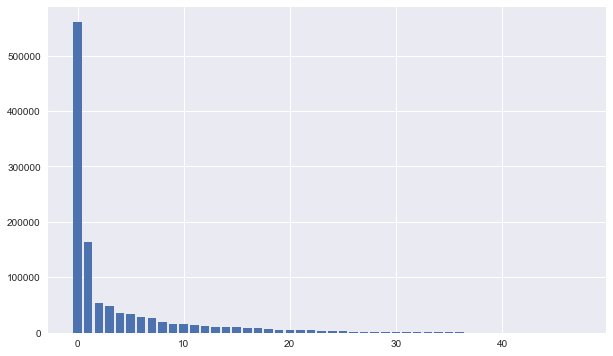

In [15]:
#事故原因の出現回数
y=data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
plt.figure(figsize=(10,6),facecolor="white")
w=0.2
x = np.arange(len(y))
plt.bar(x,y)

# やること  
1. 事故原因、streetの相関

In [16]:
Borough_Cont_Factor=data.groupby('CONTRIBUTING FACTOR VEHICLE 1')['DATETIME'].count()

In [17]:
Borough_Cont_Factor

CONTRIBUTING FACTOR VEHICLE 1
Accelerator Defective                                       495
Aggressive Driving/Road Rage                               3664
Alcohol Involvement                                        9375
Animals Action                                              627
Backing Unsafely                                          35222
Brakes Defective                                           2986
Cell Phone (hand-held)                                      175
Cell Phone (hands-free)                                     218
Driver Inattention/Distraction                           162919
Driver Inexperience                                       14702
Driverless/Runaway Vehicle                                  294
Drugs (Illegal)                                             578
Failure to Keep Right                                      2092
Failure to Yield Right-of-Way                             52938
Fatigued/Drowsy                                           48441
Fell Aslee

In [ ]:
data_frame1 = data_frame.groupby(['sex',''address]) #「性別」「住所」ごとに集約

In [17]:
Borough_Cont_Factor['DATE'].count()

BOROUGH        CONTRIBUTING FACTOR VEHICLE 1                        
BRONX          Accelerator Defective                                       65
               Aggressive Driving/Road Rage                               449
               Alcohol Involvement                                       1049
               Animals Action                                              54
               Backing Unsafely                                          3654
               Brakes Defective                                           360
               Cell Phone (hand-held)                                      17
               Cell Phone (hands-free)                                     14
               Driver Inattention/Distraction                           13626
               Driver Inexperience                                       1410
               Driverless/Runaway Vehicle                                  33
               Drugs (Illegal)                                           

In [18]:
from sklearn import preprocessing

label_encode = preprocessing.LabelEncoder()
#to convert into numbers
data_encode =data.apply(lambda x: label_encode.fit_transform(x))

TypeError: ("'>' not supported between instances of 'float' and 'str'", 'occurred at index BOROUGH')

In [ ]:
# 参考（カテゴリー変数をダミー特徴量として変換する方法）
mush_data_dummy = pd.get_dummies(mush_data[['gill_color','gill_attachment','odor','cap_color']])
mush_data_dummy.head()

In [21]:
data_dummy= pd.get_dummies(data[['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1']])

In [111]:
data_dummy.head()

,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective,CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage,CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement,CONTRIBUTING FACTOR VEHICLE 1_Animals Action,CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely,...,VEHICLE TYPE CODE 1_UNKNOWN,VEHICLE TYPE CODE 1_UTILI,VEHICLE TYPE CODE 1_VAN,VEHICLE TYPE CODE 1_VN,VEHICLE TYPE CODE 1_ambul,VEHICLE TYPE CODE 1_bus,VEHICLE TYPE CODE 1_east,VEHICLE TYPE CODE 1_subn,VEHICLE TYPE CODE 1_unk,VEHICLE TYPE CODE 1_van
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 目的変数：flg立てをする
data_dummy["flg"] = data_dummy["classes"].map(lambda x: 1 if x =='p' else 0)

## 地区と死傷者数・分類の関係

→1027,1028

In [30]:
data['BOROUGH'].value_counts(1)

BROOKLYN         0.307218
QUEENS           0.260670
MANHATTAN        0.253411
BRONX            0.132628
STATEN ISLAND    0.046073
Name: BOROUGH, dtype: float64

In [26]:
data_Bor_Injured=data.groupby('BOROUGH')['NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED'].sum()
data_Bor_Killed=data.groupby('BOROUGH')['NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED'].sum()

In [27]:
data_Bor_Injured

,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED
BOROUGH,,,,
BRONX,31295,7766,1817,21838
BROOKLYN,73771,16960,7906,49212
MANHATTAN,35563,12635,5940,17212
QUEENS,55524,11413,3940,40559
STATEN ISLAND,9172,1429,218,7592


In [58]:
#各地区ごとの負傷者、死者総計を配列に格納
list_injured = data_Bor_Injured.columns
Injured_total=np.array(list(data_Bor_Injured[list_injured[0]]))
list_killed = data_Bor_Killed.columns
Killed_total=np.array(list(data_Bor_Killed[list_killed[0]]))

In [60]:
#総計で割ることにより割合を求める
data_Bor_Injured_r = data_Bor_Injured.div(Injured_total,axis=0)
data_Bor_Killed_r = data_Bor_Killed.div(Killed_total,axis=0)

In [112]:
data_Bor_Killed_r.iloc[:,1]
#iloc:行列名を指定、loc:行列番号を指定

BOROUGH
BRONX            0.593750
BROOKLYN         0.581081
MANHATTAN        0.764706
QUEENS           0.565385
STATEN ISLAND    0.415094
Name: NUMBER OF PEDESTRIANS KILLED, dtype: float64

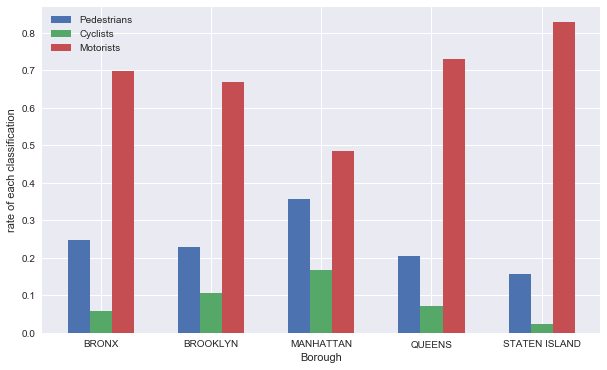

In [107]:
#injuredの地区別割合
plt.figure(figsize=(10,6),facecolor="white")
w=0.2
X = np.arange(5)
plt.bar(X, data_Bor_Injured_r.iloc[:,1], width=w,label='Pedestrians') #Y1
plt.bar(X+w, data_Bor_Injured_r.iloc[:,2],width=w,label='Cyclists') #Y2の棒グラフを隣に書く
plt.bar(X+2*w, data_Bor_Injured_r.iloc[:,3],width=w,label='Motorists') #Y2の棒グラフを隣に書く
plt.xticks(X+ w,[data_Bor_Injured.index[0],data_Bor_Injured.index[1],data_Bor_Injured.index[2],data_Bor_Injured.index[3],data_Bor_Injured.index[4]] )
plt.ylabel('rate of each classification')
plt.xlabel('Borough')
plt.legend()

## 時系列ごとのデータ分析

→1027,1028

In [124]:
#damage_timespan= DataFrame[]
data_2017['NUMBER OF PERSONS INJURED'].sum()
dt = {'NUMBER OF PERSONS INJURED':[data_2017['NUMBER OF PERSONS INJURED'].sum(),data_2016['NUMBER OF PERSONS INJURED'].sum(),data_2015['NUMBER OF PERSONS INJURED'].sum(),data_2014['NUMBER OF PERSONS INJURED'].sum(),data_2013['NUMBER OF PERSONS INJURED'].sum(),data_2012['NUMBER OF PERSONS INJURED'].sum()],\
     'NUMBER OF PEDESTRIANS INJURED':[data_2017['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2016['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2015['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2014['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2013['NUMBER OF PEDESTRIANS INJURED'].sum(),data_2012['NUMBER OF PEDESTRIANS INJURED'].sum()],\
      'NUMBER OF CYCLIST INJURED':[data_2017['NUMBER OF PERSONS INJURED'].sum(),data_2016['NUMBER OF PERSONS INJURED'].sum(),data_2015['NUMBER OF PERSONS INJURED'].sum(),data_2014['NUMBER OF PERSONS INJURED'].sum(),data_2013['NUMBER OF PERSONS INJURED'].sum(),data_2012['NUMBER OF PERSONS INJURED'].sum()]}\
    #  'NUMBER OF CYCLIST INJURED':,\
     # 'NUMBER OF MOTORIST INJURED':

## 時系列ごとに事故原因数を抽出

In [25]:
data_dummy= data

In [30]:
data_dummy['month']=data_dummy.DATETIME.dt.to_period("M")
data_dummy['month']=data_dummy.DATETIME.dt.to_period("h")

In [55]:
list1=['NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED']
data_dummy.groupby(per)[list1].count()

,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED
DATETIME,,
2012-07,16990,16990
2012-08,17140,17140
2012-09,16535,16535
2012-10,16863,16863
2012-11,15888,15888
2012-12,17119,17119
2013-01,15643,15643
2013-02,14396,14396
2013-03,16507,16507


In [38]:
list1

['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED']

In [34]:
data_dummy.columns.values

array(['DATETIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'month'], dtype=object)

In [35]:
data_dummy['CONTRIBUTING FACTOR VEHICLE 1'].values

array(['Turning Improperly', 'Failure to Keep Right',
       'Following Too Closely', ..., 'View Obstructed/Limited',
       'Other Vehicular', 'Glare'], dtype=object)

In [24]:
per = data.DATETIME.dt.to_period("M")  # new way to get the same
data.groupby(per)[data['BOROUGH'=='QUEENS']].count()

KeyError: False

In [ ]:
data_frame1 = data_frame.groupby([,''address])

In [48]:
list_CF1=data_dummy['CONTRIBUTING FACTOR VEHICLE 1'].values.tolist()
list_CF1=data_dummy['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index

In [51]:
list_CF1_2=list(list_CF1)

In [52]:
list_CF1_2

['Unspecified',
 'Driver Inattention/Distraction',
 'Failure to Yield Right-of-Way',
 'Fatigued/Drowsy',
 'Backing Unsafely',
 'Other Vehicular',
 'Turning Improperly',
 'Following Too Closely',
 'Lost Consciousness',
 'Prescription Medication',
 'Traffic Control Disregarded',
 'Driver Inexperience',
 'Passing or Lane Usage Improper',
 'Pavement Slippery',
 'Outside Car Distraction',
 'Unsafe Lane Changing',
 'Alcohol Involvement',
 'Physical Disability',
 'Oversized Vehicle',
 'Reaction to Other Uninvolved Vehicle',
 'View Obstructed/Limited',
 'Passenger Distraction',
 'Unsafe Speed',
 'Aggressive Driving/Road Rage',
 'Brakes Defective',
 'Illness',
 'Glare',
 'Other Electronic Device',
 'Obstruction/Debris',
 'Failure to Keep Right',
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
 'Fell Asleep',
 'Pavement Defective',
 'Steering Failure',
 'Tire Failure/Inadequate',
 'Animals Action',
 'Drugs (Illegal)',
 'Lane Marking Improper/Inadequate',
 'Accelerator Defective',
 'Tra

In [53]:
QUEENS=data.groupby(per)[list_CF1_2].count()

KeyError: "Columns not found: 'Failure to Yield Right-of-Way', 'Oversized Vehicle', 'Lane Marking Improper/Inadequate', 'Shoulders Defective/Improper', 'Drugs (Illegal)', 'Unspecified', 'Cell Phone (hands-free)', 'Driver Inattention/Distraction', 'Traffic Control Device Improper/Non-Working', 'Driverless/Runaway Vehicle', 'Reaction to Other Uninvolved Vehicle', 'Fatigued/Drowsy', 'Passing or Lane Usage Improper', 'Pavement Slippery', 'Animals Action', 'Brakes Defective', 'Failure to Keep Right', 'Other Vehicular', 'Driver Inexperience', 'Tire Failure/Inadequate', 'Alcohol Involvement', 'Other Lighting Defects', 'Aggressive Driving/Road Rage', 'Unsafe Speed', 'Physical Disability', 'Accelerator Defective', 'Prescription Medication', 'Steering Failure', 'Traffic Control Disregarded', 'Obstruction/Debris', 'Turning Improperly', 'Other Electronic Device', 'Illness', 'Following Too Closely', 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Headlights Defective', 'Pavement Defective', 'Lost Consciousness', 'Passenger Distraction', 'Cell Phone (hand-held)', 'Glare', 'Windshield Inadequate', 'View Obstructed/Limited', 'Unsafe Lane Changing', 'Tow Hitch Defective', 'Fell Asleep', 'Outside Car Distraction', 'Backing Unsafely'"

## 時間帯ごとに事故数を抽出

In [20]:
per_2012 = data_2012.DATETIME.dt.to_period("M")# new way to get the same
per_2013 = data_2013.DATETIME.dt.to_period("M")
per_2014 = data_2014.DATETIME.dt.to_period("M")
per_2015 = data_2015.DATETIME.dt.to_period("M")
per_2016 = data_2016.DATETIME.dt.to_period("M")
per_2017 = data_2017.DATETIME.dt.to_period("M")

In [43]:
month_2012=data.groupby(per_2012)['BOROUGH'].count()
month_2013=data.groupby(per_2013)['BOROUGH'].count()
month_2014=data.groupby(per_2014)['BOROUGH'].count()
month_2015=data.groupby(per_2015)['BOROUGH'].count()
month_2016=data.groupby(per_2016)['BOROUGH'].count()
month_2017=data.groupby(per_2017)['BOROUGH'].count()

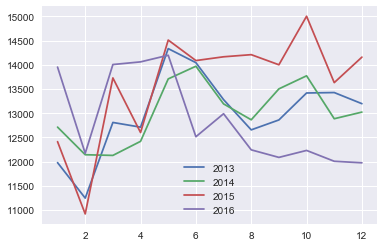

In [61]:
x=np.arange(1,13)
plt.plot(x,month_2013,label='2013')
plt.plot(x,month_2014,label='2014')
plt.plot(x,month_2015,label='2015')
plt.plot(x,month_2016,label='2016')
plt.legend()

2月は少なく５月は多い、 
１０月も増えがち。11月で下がりがち

In [21]:
for i in range(2012,2018):
    filename=data+str(i)
    print(filename)
#    per[i]=filename.DATE.dt.to_period("M")

TypeError: Could not compare ['2012'] with block values

In [134]:
data_timespan=data.groupby(per)['BOROUGH'].count()

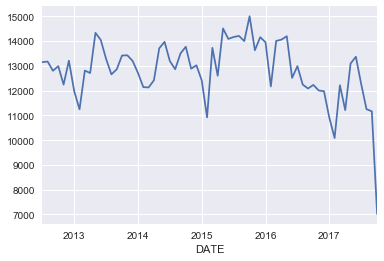

In [135]:
data_timespan.plot()

## 複数のデータフレームの処理

In [ ]:
import pandas as pd
#import numpy as np
#import pickle
#import zipfile
import os
import sys


#データ読み込み関数 1ファイルを読み込み
def read_file( i, path, rfile ):

   filepath = r"{0}\{1}".format(path,rfile)
   tmp_data = pd.read_csv( filepath,
               encoding="sjis",
                           nrows=100, #今だけ１００行に制限
                           header=None                    
                       )

    #カラム名を設定
    tmp_data.columns =['ID', 'name','score']
    # ファイル内に科目名を示す情報がないため列（index）を追加
    tmp_data['nm_filenumber'] = '{0:02d}'.format(i) 
    return tmp_data

##ディレクトリ以下の全ファイルを繰り返し処理
target_dir = r"\\Server\Readonly\ClientA\17年2月"

for i, filename in enumerate( os.listdir(target_dir)):
    print(i, filename )

# ここで展開したファイル名を次々にデータ化したい､このループ内を想定。
# 一旦ループの外で、手入力すると下記の様になる｡

df_01 = read_file( 1, target_dir, r"ClientA_KOKUGO_201702.csv" )
df_02 = read_file( 2, target_dir, r"ClientA_RIKA_201702.csv" )
df_03 = read_GC( 3, target_dir, r"ClientA_SANSU_201702.csv" )
#... 続く

# 後続処理
# 上記データを全て横結合
# 上記データを全て縦結合

In [36]:
df_list=[]
for i in range(2012,2018):
    df.append(data_i)
df_list

NameError: name 'data_i' is not defined

In [35]:
DataFrame(str(data_2012)).columns

ValueError: DataFrame constructor not properly called!

In [65]:
import pandas as pd
import glob
import os

#DATA_DIR='./data'

files = glob.glob(os.path.join('*.csv'))
df_list=[]
for file in files:
    tmp_df = pd.read_csv(file,parse_dates=[0],encoding="sjis") #サブディレクトリも読み込むときはencoding="sjis"
    tmp_df['filename'] = os.path.basename(file)
#    df_list.append(tmp_df)
#df = pd.concat(df_list, ignore_index=True)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data_

In [23]:
import pandas as pd
import glob
import os
files = glob.glob(os.path.join('*.csv'))

In [136]:
per2 = data.TIME.dt.to_period("h")  # new way to get the same

In [137]:
month_timespan=data.groupby(per2)['BOROUGH'].count()

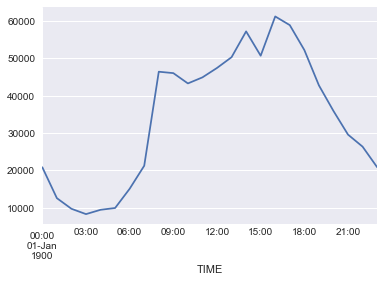

In [138]:
month_timespan.plot()

## 月ごとに事故数を抽出

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137849 entries, 0 to 1137848
Data columns (total 29 columns):
DATE                             1137849 non-null datetime64[ns]
TIME                             1137849 non-null datetime64[ns]
BOROUGH                          820326 non-null object
ZIP CODE                         820247 non-null object
LATITUDE                         927296 non-null float64
LONGITUDE                        927296 non-null float64
LOCATION                         927296 non-null object
ON STREET NAME                   922954 non-null object
CROSS STREET NAME                875298 non-null object
OFF STREET NAME                  172082 non-null object
NUMBER OF PERSONS INJURED        1137849 non-null int64
NUMBER OF PERSONS KILLED         1137849 non-null int64
NUMBER OF PEDESTRIANS INJURED    1137849 non-null int64
NUMBER OF PEDESTRIANS KILLED     1137849 non-null int64
NUMBER OF CYCLIST INJURED        1137849 non-null int64
NUMBER OF CYCLIST KILLED   